## 1. Import dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Zaimportuj dane

ds_salaries = pd.read_csv('ds_salaries.csv')
ds_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
print(f"There is {ds_salaries.shape[0]} rows and {ds_salaries.shape[1]} columns")


There is 3755 rows and 11 columns


In [4]:
ds_salaries.info()

print(f'\nDataset have zero null values')
print(f'\nThere are 6 categorical columns that are worth mentioning:')
print(f'experience_level, employment_type, job_title, employee_residence, company_location and company_size)')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB

Dataset have zero null values

There are 6 categorical columns that are worth mentioning:
experience_level, employment_type, job_title, employee_residence, company_location and company_size)


## 2. Initial analysis

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

### 2.1. Categorical columns

#### 2.1.1. Experience_level

In [6]:
print(f'There is {len(ds_salaries["experience_level"].unique())} unique values in this columns')
print('Those are:')
print('EN, which refers to Entry-level')
print('MI, which refers to Mid-level')
print('SE, which refers to Senior-level')
print('EX, which refers to Executive-level')


There is 4 unique values in this columns
Those are:
EN, which refers to Entry-level
MI, which refers to Mid-level
SE, which refers to Senior-level
EX, which refers to Executive-level


In [7]:
print("Let's replace that short names with proper values")

ds_salaries['experience_level'] = ds_salaries['experience_level'].replace({
        'EN': 'Entry-level',
        'MI': 'Mid-level',
        'SE': 'Senior-level',
        'EX': 'Executive-level'
    })

Let's replace that short names with proper values


And now check how distribution look like


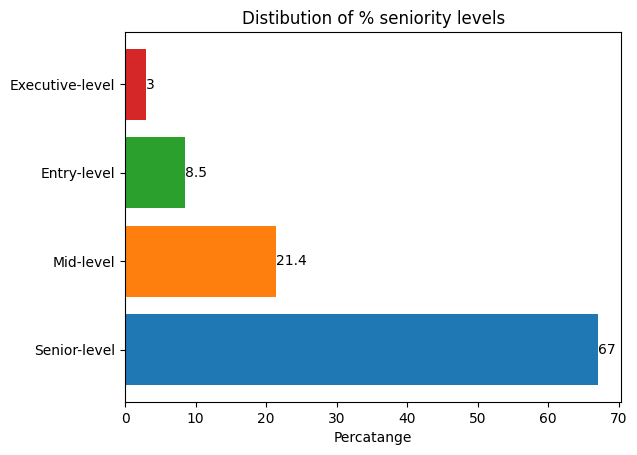

In [8]:
print('And now check how distribution look like')

level_count = ds_salaries['experience_level'].value_counts()
level_values = [level_count[i] / sum(level_count) for i in range(len(level_count))]

fig, ax = plt.subplots()

for i, level in enumerate(level_count.index):
    rects = ax.barh(level, round(level_values[i]*100, 1), label=level)

    ax.bar_label(rects)

ax.set_xlabel('Percatange')
ax.set_title('Distibution of % seniority levels')

plt.show()

#### 2.1.2. Employment_type

In [9]:
print(f'There is {len(ds_salaries["employment_type"].unique())} unique values in this columns')
print('Those are:')
print('FT - Full-time')
print('CT - Contract')
print('FL - Freelance')
print('PT - Part-time')

There is 4 unique values in this columns
Those are:
FT - Full-time
CT - Contract
FL - Freelance
PT - Part-time


In [10]:
print("Let's replace that short names with proper values")

ds_salaries['employment_type'] = ds_salaries['employment_type'].replace({
        'FT': 'Full-time',
        'CT': 'Contract',
        'FL': 'Freelance',
        'PT': 'Part-time'
    })

Let's replace that short names with proper values


And now check how the distrubtion look like


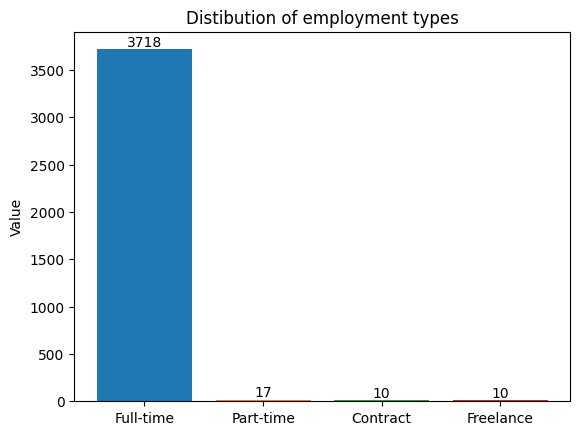

Well...
One category is defiinetely the most popular option


In [11]:
print("And now check how the distrubtion look like")

empl_type = ds_salaries['employment_type'].value_counts()
empl_values = [empl_type[i] for i in range(len(empl_type))]

fig, ax = plt.subplots()

for i, empl in enumerate(empl_type.index):
    temp = ax.bar(empl, empl_values[i], label=empl)

    ax.bar_label(temp)

ax.set_ylabel('Value')
ax.set_title('Distibution of employment types')

plt.show()

print("Well...")
print("One category is defiinetely the most popular option")

#### 2.1.3 Job_title

In [12]:
print(f"There is {len(ds_salaries['job_title'].unique())} unique values in this column")
print("That's a lot, so I will be focusing on the most important values")
print("But first let's find what are those values")

ds_salaries['job_title'] = ds_salaries['job_title'].replace('ML Engineer', 'Machine Learning Engineer')

There is 93 unique values in this column
That's a lot, so I will be focusing on the most important values
But first let's find what are those values


C:\Users\Stasiek\AppData\Local\Temp\ipykernel_8764\3790299104.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_color = plt.cm.get_cmap('Blues')
C:\Users\Stasiek\AppData\Local\Temp\ipykernel_8764\3790299104.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=titles_short.index, rotation=-90)


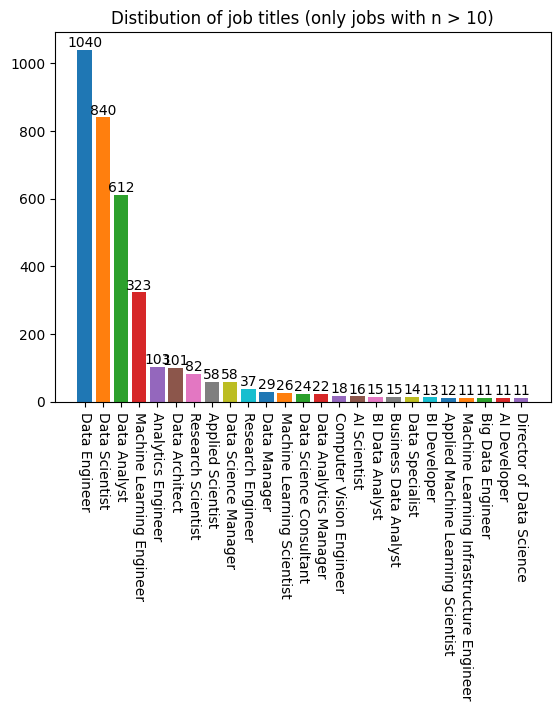

In [13]:
titles = ds_salaries['job_title'].value_counts()
titles_short = titles[titles > 10]
values = titles_short.to_list()

fig, ax = plt.subplots()

base_color = plt.cm.get_cmap('Blues')
colors = [base_color(i / len(titles_short)) for i in range(len(titles_short))]

for i, title in enumerate(titles_short.index):
    temp = ax.bar(title, values[i], label=title)
    ax.bar_label(temp)

ax.set_title('Distibution of job titles (only jobs with n > 10)')
ax.set_xticklabels(labels=titles_short.index, rotation=-90)

plt.show()

#### 2.1.4. Company_size

In [14]:
print("For company_size columns distinct values look like this:")
print("S - less than 50 employees")
print("M - from 50 to 250 employees")
print("L - more than 250 employees")

For company_size columns distinct values look like this:
S - less than 50 employees
M - from 50 to 250 employees
L - more than 250 employees


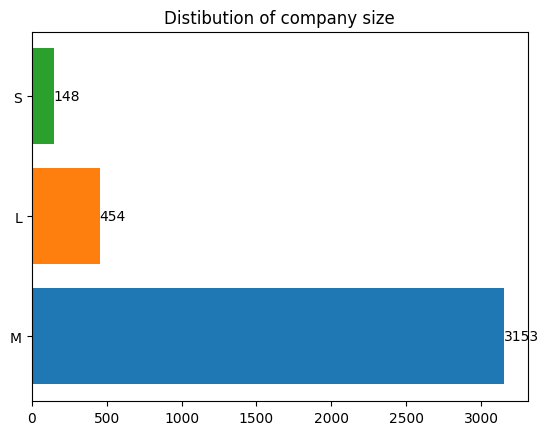

In [15]:
sizes = ds_salaries['company_size'].value_counts()
values = sizes.to_list()

fig, ax = plt.subplots()

for i, size in enumerate(sizes.index):
    temp = ax.barh(size, values[i], label=size)
    ax.bar_label(temp)

ax.set_title('Distibution of company size')

plt.show()

### 2.2. Numerical columns

#### 2.2.1. Work_year

In [16]:
print("In work_year column there are data from 2020 to 2023")

In work_year column there are data from 2020 to 2023


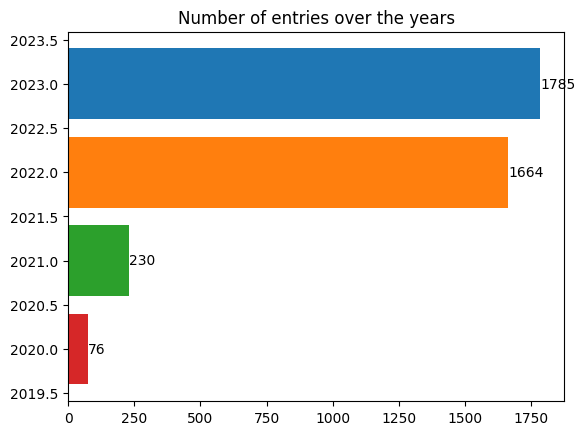

In [17]:
years = ds_salaries['work_year'].value_counts()
values = years.to_list()

fig, ax = plt.subplots()

for i, year in enumerate(years.index):
    temp = ax.barh(year, values[i], label=year)
    ax.bar_label(temp)

ax.set_title("Number of entries over the years")

plt.show()

#### 2.2.2. Salary_in_usd

In [18]:
print("This column have a lot different values, so I want to present them differently")
print("Let's use pandas describe")

ds_salaries['salary_in_usd'].describe()

This column have a lot different values, so I want to present them differently
Let's use pandas describe


count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

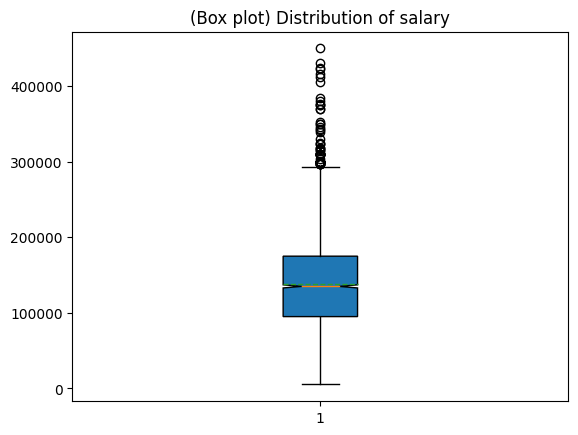

In [19]:
salary_values = ds_salaries['salary_in_usd']

fig, ax = plt.subplots()

ax.boxplot(salary_values, patch_artist=True, notch=True, showmeans=True, meanline=True)
ax.set_title("(Box plot) Distribution of salary")

plt.show()

c:\Users\Stasiek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


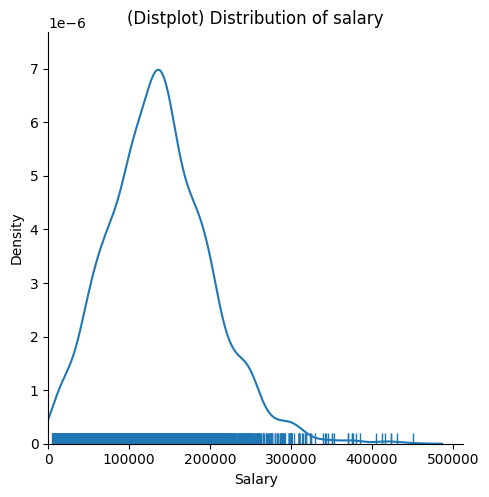

In [89]:
g = sns.displot(data=salary_values, kind='kde', rug=True)
g = g.set_xlabels("Salary")
g = g.set(title="(Distplot) Distribution of salary", xlim=(0))

#### 2.2.3. Remote_ratio

In [21]:
print("This column is unordynary, because It contains numeric data (100, 50, 0), but they are no continous")
print("So I decided to change them to more naturall type")
print("100 - Remote")
print("50 - Hybrid")
print("0 - On-site")

ds_salaries['remote_ratio'] = ds_salaries['remote_ratio'].replace({100: 'Remote', 0:'On-site', 50:'Hybrid'})

This column is unordynary, because It contains numeric data (100, 50, 0), but they are no continous
So I decided to change them to more naturall type
100 - Remote
50 - Hybrid
0 - On-site


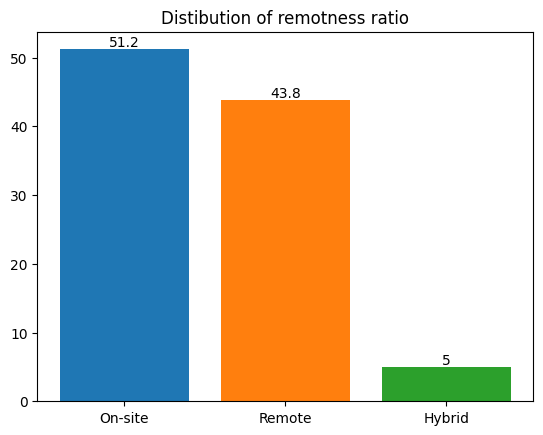

In [22]:
ratios = ds_salaries['remote_ratio'].value_counts()
values = [ratios[i] / sum(ratios) for i in range(len(ratios))]

fig, ax = plt.subplots()

for i, ratio in enumerate(ratios.index):
    temp = ax.bar(ratio, round(values[i]*100, 1), label=ratio)
    ax.bar_label(temp)

ax.set_title('Distibution of remotness ratio')

plt.show()

## 3. Experience level analysis

### 3.1. Experience level by work year

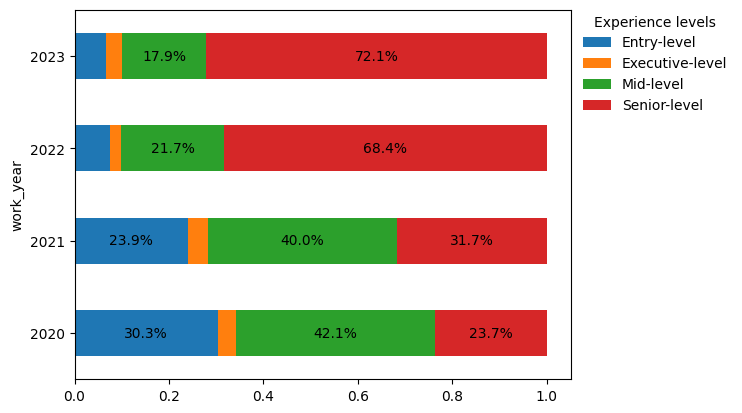

In [23]:
year_group = ds_salaries.groupby('work_year')['experience_level'].value_counts(normalize=True).unstack('experience_level')

plot = year_group.plot.barh(stacked=True)

plt.legend(title="Experience levels", frameon=False, bbox_to_anchor=(1, 1.02))

for ix, row in year_group.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element == element and element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{round(element * 100, 1)}%",
                    va="center",
                    ha="center",
                )
            cumulative += element

#### Conlusion

Over the year, required experience level is increasing and companies are less willing to hire juniors. This is in-line with the news that it's really hard to find entry level jobs

### 3.2. Experience level by job title

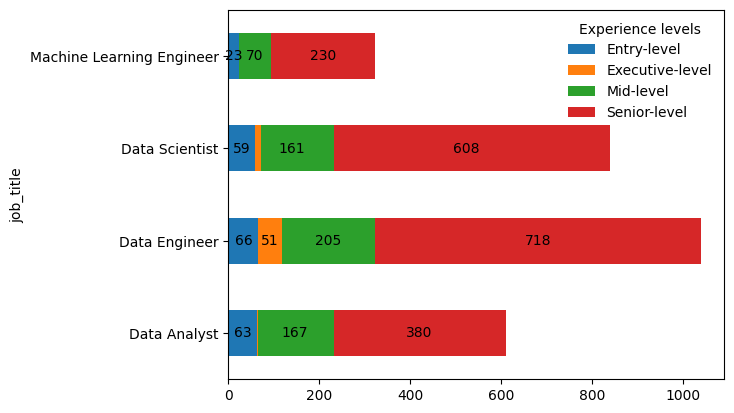

In [24]:
job_group = ds_salaries.groupby('job_title')['experience_level'].value_counts()

idx_job = ds_salaries['job_title'].unique().tolist()

for i, job in enumerate(idx_job):
    job_sum = sum(job_group.loc[job, :])
    if job_sum < 200:
        job_group.drop((job), inplace=True)

job_group = job_group.unstack('experience_level')

job_group.plot.barh(stacked=True)
plt.legend(title="Experience levels", frameon=False)

for ix, row in job_group.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element and element > 20:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)}",
                    va="center",
                    ha="center",
                )
                cumulative += element
    

#### Conclusion

1) Senior Data Engieers are position with the biggest number of jobs, but Senior Data Scientist are just behind. 
2) There is only little difference in Entry-level position across the most popular job types
3) ML Engineers and Data Anlysist jobs have small numbers of Executive-level positions. However ML Engineers jobs are quite new, so in the future there might be a difference

### 3.3. Experience level by employment type

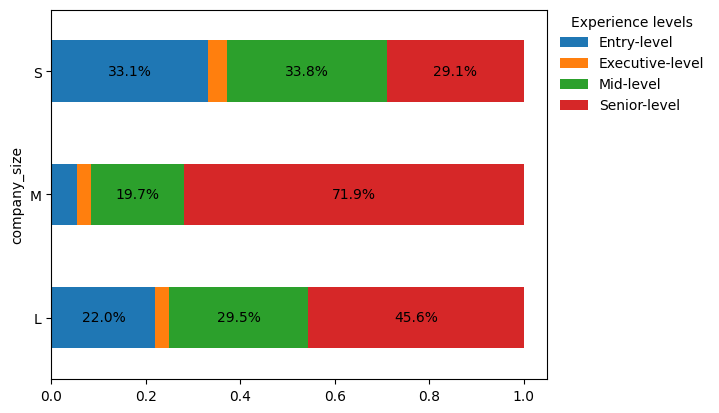

In [25]:
empl_group = ds_salaries.groupby("company_size")['experience_level'].value_counts(normalize=True).unstack('experience_level')
idx_empl = ds_salaries['employment_type'].unique().tolist()

empl_group.plot.barh(stacked=True)

plt.legend(title="Experience levels", frameon=False, bbox_to_anchor=(1, 1.02))

for ix, row in empl_group.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element == element and element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{round(element * 100, 1)}%",
                    va="center",
                    ha="center",
                )
            cumulative += element

#### Conlusion

1) Senior-level workers are most needed in medium size companies (72%). The smallest percentage of this level jobs are in small size companies (29%)
2) The biggest percetange of entry-level jobs are in small sized companies. The reason for this might be a smaller budget

## 4. Salary analysis

### 4.1. Salary by work year

c:\Users\Stasiek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


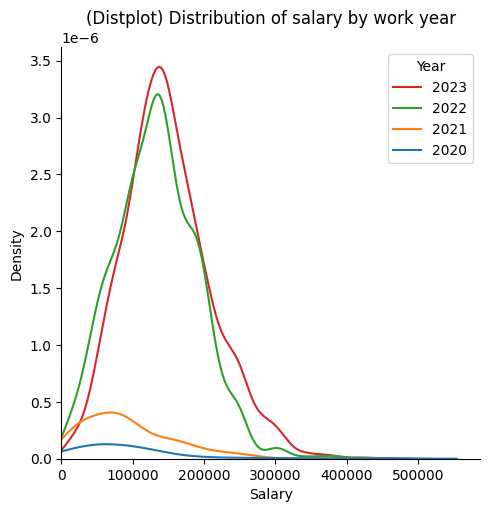

In [107]:
g = sns.displot(ds_salaries, x="salary_in_usd", hue="work_year", kind="kde", palette=sns.color_palette("tab10")[:4], legend=False)
g.set_xlabels("Salary")
g.set(title="(Distplot) Distribution of salary by work year", xlim=(0))

plt.legend(title="Year", labels=["2023", "2022", "2021", "2020"])
plt.show(g)

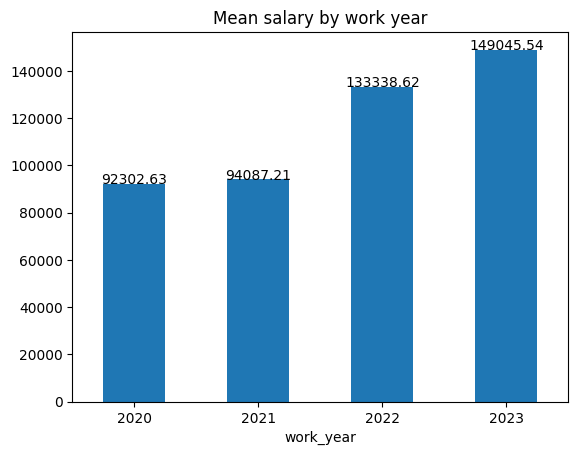

In [129]:
salary_year = ds_salaries.groupby("work_year")["salary_in_usd"].mean()

salary_year.plot.bar()

for i, l in enumerate(salary_year.index):
    plt.text(i, salary_year[l], round(salary_year[l], 2), ha="center")

plt.title("Mean salary by work year")
plt.xticks(rotation=0)
plt.show()



#### Conlusion

1) Distributions in 2020 and 2021 are simillar. 
2) Distributions in 2022 and 2023 are also simillar.
3) In 2022 and 2023 mean salary is higher than in previous years. We also know (from previous charts) that in those years there is more jobs with higher seniority level, so this might be couse of bigger salaries

### 4.2. Salary by experience level

c:\Users\Stasiek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


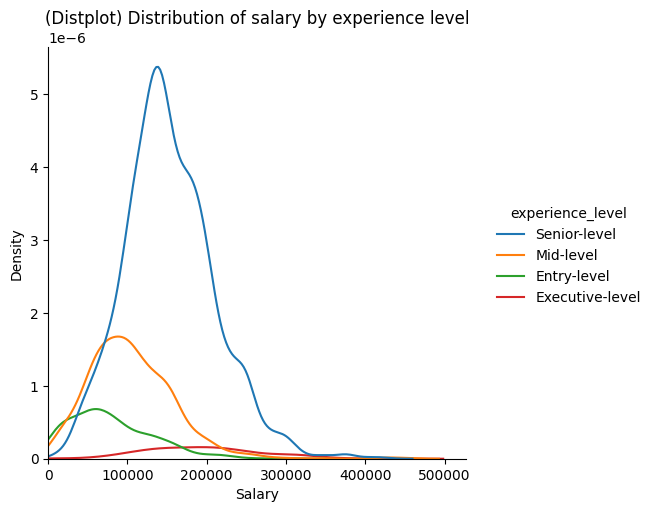

In [141]:
g = sns.displot(ds_salaries, x="salary_in_usd", hue="experience_level", kind="kde", palette=sns.color_palette("tab10")[:4])
g.set_xlabels("Salary")
g.set(title="(Distplot) Distribution of salary by experience level", xlim=(0))

plt.show(g)

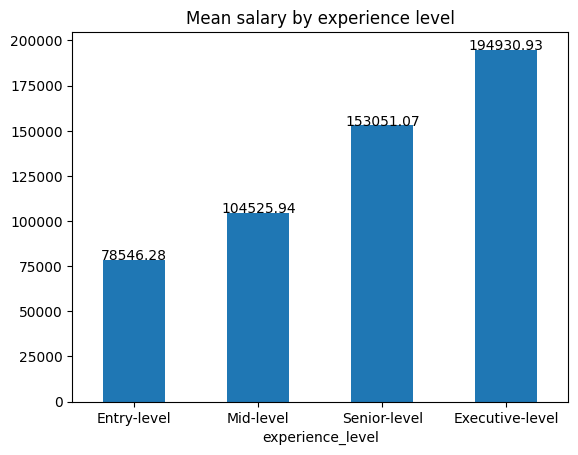

In [144]:
salary_exp = ds_salaries.groupby("experience_level")["salary_in_usd"].mean().sort_values()

salary_exp.plot.bar()

for i, l in enumerate(salary_exp.index):
    plt.text(i, salary_exp[l], round(salary_exp[l], 2), ha="center")

plt.title("Mean salary by experience level")
plt.xticks(rotation=0)
plt.show()

#### Conlusion

Nothing unexpected here. With more experience level your salary is increasing.

### 4.3. Salary by job titles

### 4.4. Salary by company size

### rest

In [26]:
object_columns = ds_salaries.select_dtypes(include=['object']).columns

print(f'W zbiorze danych jest {len(object_columns)} kolumn o typie innej niż liczbowy')

W zbiorze danych jest 8 kolumn o typie innej niż liczbowy


In [27]:
for col in object_columns:
    print(f'Kolumna {col} ma {len(ds_salaries[col].unique())} różnych wartości')

Kolumna experience_level ma 4 różnych wartości
Kolumna employment_type ma 4 różnych wartości
Kolumna job_title ma 92 różnych wartości
Kolumna salary_currency ma 20 różnych wartości
Kolumna employee_residence ma 78 różnych wartości
Kolumna remote_ratio ma 3 różnych wartości
Kolumna company_location ma 72 różnych wartości
Kolumna company_size ma 3 różnych wartości


## 2. Dostosowanie kolumn nieliczbowych

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
data = ds_salaries.copy()

data_obj = data[object_columns]

labelEncoder = LabelEncoder()

for col in object_columns:
    data[col] = labelEncoder.fit_transform(data[col])

print("Zdecydowałem się na użycie LabelEncodera, ponieważ przy zbiór danych ma kilka kolumn nienumerycznych, które mają sporo różnych wartości.")
print("Niestety nie mają one teraz wartości 0-1, dlatego będzie konieczne przesklawoanie tych wartości")

Zdecydowałem się na użycie LabelEncodera, ponieważ przy zbiór danych ma kilka kolumn nienumerycznych, które mają sporo różnych wartości.
Niestety nie mają one teraz wartości 0-1, dlatego będzie konieczne przesklawoanie tych wartości


## 3. Podział danych i ich skalowanie

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [31]:
y = data['salary_in_usd']
X = data.drop('salary_in_usd', axis=1)  #To tworzy kopię data i dopiero wtedy usuwa kolumnę, więc oryginalna data jest nietknięta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
preprocessing_pipeline = make_pipeline(
    MinMaxScaler(),
)

print("Ten potok pozwala na przeskalowanie wartości do zakresu <0; 1> przy pomocy metody MinMaxScaler")

Ten potok pozwala na przeskalowanie wartości do zakresu <0; 1> przy pomocy metody MinMaxScaler


## 4. DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [34]:
dtc_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classification', DecisionTreeClassifier())
])

In [35]:
dtc_params = {
    'classification__criterion':['gini','entropy'],
    'classification__max_depth':np.arange(1, 21).tolist()[0::2],
    'classification__min_samples_split':np.arange(2,11).tolist()[0::2],
    'classification__max_leaf_nodes':np.arange(3,501).tolist()[0::2]
}

In [36]:
r1 = RandomizedSearchCV(dtc_pipeline, dtc_params, cv=5, n_iter=100, random_state=42)

In [37]:
# r1.fit(X_train, y_train)

In [38]:
# r1.best_params_

In [39]:
# r1.score(X_test, y_test)

In [40]:
# y_pred = r1.predict(X_test)

# print(f'Accuracy score: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
# print(f'Precyzja: {precision_score(y_true=y_test, y_pred=y_pred, average="weighted")}')
# print(f'Czułość: {recall_score(y_true=y_test, y_pred=y_pred, average="weighted")}')

## 5. RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rfr_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classification', RandomForestRegressor())
])

In [43]:
rfr_params = {
    'classification__n_estimators':np.arange(80, 111).tolist()[0::2],
    'classification__criterion':['squared_error','absolute_error', 'friedman_mse', 'poisson'],
    'classification__max_depth':np.arange(10, 21).tolist()[0::2],
    'classification__min_samples_split':np.arange(2,11).tolist()[0::2]
}

In [44]:
r2 = RandomizedSearchCV(rfr_pipeline, rfr_params, cv=5, n_iter=10, random_state=42)

In [45]:
# r2.fit(X_train, y_train)

In [46]:
# r2.best_params_

In [47]:
# r2.score(X_test, y_test)

In [48]:
# y_pred = r2.predict(X_test)

# print(f'R2 score: {r2_score(y_true=y_test, y_pred=y_pred)}')
# print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred)}')
# print(f'MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred)}')

## 6. LinearRegression

In [49]:
#Niestety LinearRegression z biblioteki sklearn nie posiada hiperparametrów, więc nie mógłbym ich "podkręcać".
#Zdecydowałem się, więc na użycie SGDRegressor, który również jest w module linear_model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [50]:
lr_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classification', SGDRegressor())
])

In [51]:
lr_params = {
    'classification__loss':['squared_error', 'huber', 'squared_epsilon_insensitive'],
    'classification__penalty':['l2', 'l1'],
    'classification__max_iter':np.arange(900, 1501).tolist()[::25],
    'classification__learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
    'classification__eta0':np.arange(0.001, 0.05, 0.005),
    'classification__n_iter_no_change':np.arange(1, 21).tolist()[::2]
}

In [52]:
r3 = RandomizedSearchCV(lr_pipeline, lr_params, cv=5, n_iter=100, random_state=42)

In [53]:
# r3.fit(X_train, y_train)

In [54]:
# r3.best_params_

In [55]:
# r3.score(X_test, y_test)

In [56]:
# y_pred = r3.predict(X_test)

# print(f'R2 score: {r2_score(y_true=y_test, y_pred=y_pred)}')
# print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred)}')
# print(f'MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred)}')